In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt



# Definir os dados de entrada e saída
X = np.array([
    [4,4,2,1,2,1,1,3,2,2,1,2,2,1,9,1,4,2,2,2,3,3,0,0,0,0,1,0,1,0],
    [3,3,2,1,1,2,1,2,1,8,1,3,2,1,5,1,4,0,0,0,0,0,0,1,0,0,0,0,1,0],
    [3,2,3,2,1,1,4,2,1,6,1,4,2,1,2,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1],
    [4,2,2,1,2,1,3,2,1,4,1,3,2,1,3,1,4,2,1,8,1,4,0,0,0,0,0,1,1,1],
    [3,3,2,1,1,1,1,3,2,1,1,3,2,1,3,1,4,0,0,0,0,0,0,1,0,0,0,0,1,0],

    [3,2,2,1,2,1,4,2,2,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
    [3,2,2,2,7,0,0,2,1,5,1,4,2,1,5,1,4,2,1,2,1,1,0,0,0,0,0,0,1,0],
    [2,2,2,1,5,1,1,3,2,1,1,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
    [4,2,2,1,8,1,1,2,1,2,1,3,3,2,7,1,3,2,1,8,1,1,0,1,0,0,1,0,0,0],
    [2,0,2,2,2,2,3,2,1,4,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0]])
y = np.array([
    [1],
    [1],
    [1],
    [1],
    [1],
    [-1],
    [-1],
    [-1],
    [-1],
    [-1]
])


# Criar o modelo da rede neural
model = Sequential()
model.add(Dense(32, input_dim=X.shape[1], activation='relu'))
model.add(Dense(1, activation='tanh'))

# Compilar o modelo
model.compile(loss='mse', optimizer='adam')

In [ ]:
#Questão 1.1
#Treinos excluindo um trem do Oeste e dois trens do Leste

acuracias = []

for i in range(0,5):
  # Criar o modelo da rede neural
  model = Sequential()
  model.add(Dense(32, input_dim=X.shape[1], activation='relu'))
  model.add(Dense(1, activation='tanh'))

  # Compilar o modelo
  model.compile(loss='mse', optimizer='adam')
  print(f"Teste {i+1}")

  #Selecao dos dados de teste e treino
  Selecao = np.array([X[i],  X[(i+1)%5], X[5]])
  Selecao_gabarito = np.array([y[i], y[(i+1)%5], y[5]])
  Teste = np.delete(X, [i, (i+1)%5, 5], axis=0)
  Teste_gabarito = np.delete(y, [i, (i+1)%5, 5], axis=0)

  # Treinar o modelo
  model.fit(Teste, Teste_gabarito, epochs=100, batch_size=1, verbose = 0)

  # Fazer previsões
  acertos = 0
  for j in range(0,3):
    entrada = Selecao[j]
    previsao = model.predict(np.array([entrada]))
    print(f"Resposta correta: {Selecao_gabarito[j]}")
    if previsao[0][0] > 0:
        print(f"Previsao: {previsao[0][0]}")
        print("O trem vai para leste.")
        if Selecao_gabarito[j] == 1:
          acertos += 1
    else:
        print("O trem vai para oeste.")
        if Selecao_gabarito[j] == -1:
          acertos += 1
  print(f"acertos = {acertos}")
  print(f"ACURACIA = {acertos/3}")
  acuracias.append(acertos/3)

Teste 1
1/1 [==============================] - 0s 37ms/step
Resposta correta: [1]
O trem vai para oeste.
1/1 [==============================] - 0s 20ms/step
Resposta correta: [1]
Previsao: 0.9921466112136841
O trem vai para leste.
1/1 [==============================] - 0s 15ms/step
Resposta correta: [-1]
Previsao: 0.459627240896225
O trem vai para leste.
acertos = 1
ACURACIA = 0.3333333333333333
Teste 2
1/1 [==============================] - 0s 33ms/step
Resposta correta: [1]
Previsao: 0.9302905201911926
O trem vai para leste.
1/1 [==============================] - 0s 15ms/step
Resposta correta: [1]
Previsao: 0.20593343675136566
O trem vai para leste.
1/1 [==============================] - 0s 17ms/step
Resposta correta: [-1]
O trem vai para oeste.
acertos = 3
ACURACIA = 1.0
Teste 3
1/1 [==============================] - 0s 36ms/step
Resposta correta: [1]
O trem vai para oeste.
1/1 [==============================] - 0s 16ms/step
Resposta correta: [1]
Previsao: 0.3711676299571991
O trem 

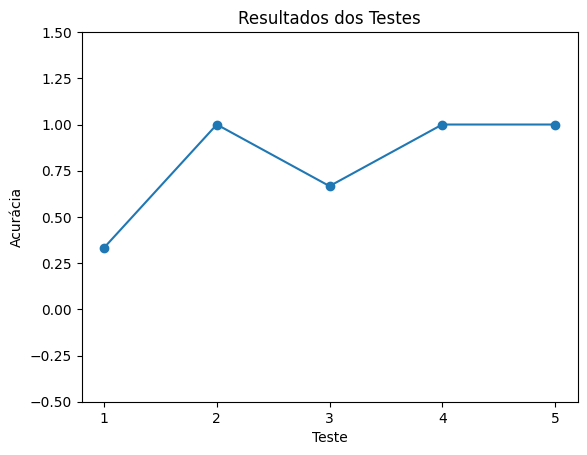

In [ ]:
#Questão 1.2

# Criação gráfico da acurácia dos testes removendo dois do Leste e um do Oeste
numeros_teste = range(1, len(acuracias) + 1)
plt.plot(numeros_teste, acuracias, marker='o')
plt.xlabel('Teste')
plt.ylabel('Acurácia')
plt.title('Resultados dos Testes')
plt.xticks(np.arange(min(numeros_teste), max(numeros_teste)+1, 1))
plt.ylim(-0.5, 1.5)

# Exibir o gráfico
plt.show()


In [ ]:
#Questão 1.3
#Treinos excluindo um trem do Leste e dois trens do Oeste

acuracias2 = []

for i in range(5,10):
  # Criar o modelo da rede neural
  model = Sequential()
  model.add(Dense(32, input_dim=X.shape[1], activation='relu'))
  model.add(Dense(1, activation='tanh'))

  # Compilar o modelo
  model.compile(loss='mse', optimizer='adam')
  print(f"Teste {i+1}")

  print(f"Teste {i+1}")
  if i<9:
    Selecao = np.array([X[i],  X[i+1], X[0]])
    Selecao_gabarito = np.array([y[i], y[(i+1)], y[0]])
    Teste = np.delete(X, [i, i+1, 0], axis=0)
    Teste_gabarito = np.delete(y, [i, i+1, 0], axis=0)
  else:
    Selecao = np.array([X[i],  X[5], X[0]])
    Selecao_gabarito = np.array([y[i], y[(5)], y[0]])
    Teste = np.delete(X, [i, 5, 0], axis=0)
    Teste_gabarito = np.delete(y, [i, 5, 0], axis=0)

  # Treinar o modelo
  model.fit(Teste, Teste_gabarito, epochs=100, batch_size=1, verbose = 0)

  # Fazer previsões
  acertos = 0
  for j in range(0,3):
    entrada = Selecao[j]
    previsao = model.predict(np.array([entrada]))
    print(f"Resposta correta: {Selecao_gabarito[j]}")
    if previsao[0][0] > 0:
        print(f"Previsao: {previsao[0][0]}")
        print("O trem vai para leste.")
        if Selecao_gabarito[j] == 1:
          acertos += 1
    else:
        print("O trem vai para oeste.")
        if Selecao_gabarito[j] == -1:
          acertos += 1
  print(f"acertos = {acertos}")
  print(f"ACURACIA = {acertos/3}")
  acuracias2.append(acertos/3)


Teste 6
Teste 6
1/1 [==============================] - 0s 36ms/step
Resposta correta: [-1]
O trem vai para oeste.
1/1 [==============================] - 0s 15ms/step
Resposta correta: [-1]
O trem vai para oeste.
1/1 [==============================] - 0s 17ms/step
Resposta correta: [1]
O trem vai para oeste.
acertos = 2
ACURACIA = 0.6666666666666666
Teste 7
Teste 7
1/1 [==============================] - 0s 48ms/step
Resposta correta: [-1]
O trem vai para oeste.
1/1 [==============================] - 0s 14ms/step
Resposta correta: [-1]
O trem vai para oeste.
1/1 [==============================] - 0s 14ms/step
Resposta correta: [1]
Previsao: 0.830155074596405
O trem vai para leste.
acertos = 3
ACURACIA = 1.0
Teste 8
Teste 8
1/1 [==============================] - 0s 34ms/step
Resposta correta: [-1]
O trem vai para oeste.
1/1 [==============================] - 0s 14ms/step
Resposta correta: [-1]
Previsao: 0.6945512294769287
O trem vai para leste.
1/1 [==============================] - 0s 14

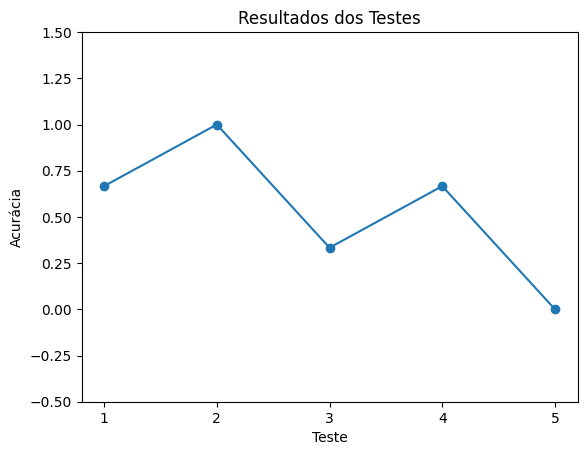

In [ ]:
#Questão 1.4

# Criação gráfico da acurácia dos testes removendo dois trens do Oeste e um do Leste
numeros_teste = range(1, len(acuracias2) + 1)
plt.plot(numeros_teste, acuracias2, marker='o')
plt.xlabel('Teste')
plt.ylabel('Acurácia')
plt.title('Resultados dos Testes')
plt.xticks(np.arange(min(numeros_teste), max(numeros_teste)+1, 1))
plt.ylim(-0.5, 1.5)

# Exibir o gráfico
plt.show()


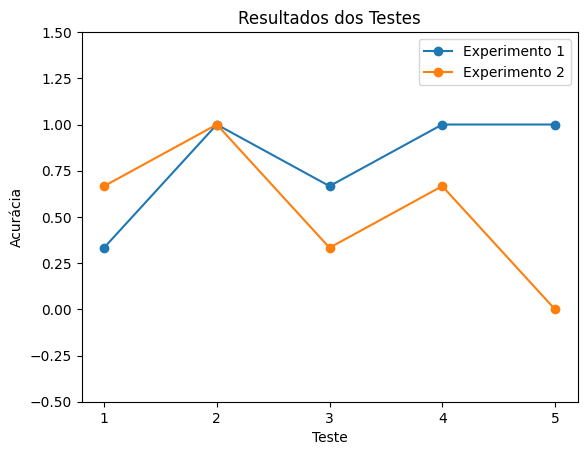

In [ ]:
# Resultados dos testes (acurácias)

# Números de teste
numeros_teste = range(1, len(acuracias) + 1)

# Configurar o gráfico
plt.plot(numeros_teste, acuracias, marker='o', label='Experimento 1')
plt.plot(numeros_teste, acuracias2, marker='o', label='Experimento 2')
plt.xlabel('Teste')
plt.ylabel('Acurácia')
plt.title('Resultados dos Testes')
plt.xticks(np.arange(min(numeros_teste), max(numeros_teste) + 1, 1))
plt.ylim(-0.5, 1.5)
plt.legend()

# Exibir o gráfico
plt.show()

#Nos dois experimentos houve a mesma quantidade de acertos (10). Esses testes podem ser úteis para identificar.
#Quais trens tem algum padrão importante, de forma que se possa melhor ajustar os pesos dos neurônios.

#Questão 2


In [ ]:
#Dependências
!pip install keras-rectified-adam keras.utils tqdm numpy pandas sklearn tensorflow matplotlib

  Using cached keras-utils-1.0.13.tar.gz (2.4 kB)
  Preparing metadata (setup.py) ... done
  Using cached sklearn-0.0.post5.tar.gz (3.7 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2634 sha256=bf56a46d25f5ef4e793640a27ffbfc88e108038da45b8bb1e9c0ed48a61b09b0
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=82ac19d159f777f19dfdf7c4dbd3b18023f2f03e3a21cf4f71534e2bb609bd08
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built keras.utils sklearn


In [ ]:
#Dependências
!pip install --upgrade keras-rectified-adam

In [ ]:
import tqdm
import numpy as np
import pandas as pd
from sklearn.model_selection import LeaveOneOut
import keras
from tensorflow.keras.models import Sequential
from keras.models import Sequential, Model
from keras.layers import Dense, Input, concatenate
from keras.losses import binary_crossentropy
from keras.utils import plot_model
from keras_radam import RAdam
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')


In [ ]:
from keras import backend as K
import tensorflow as tf
import numpy as np
import random
import os

seed_value = 0

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
os.environ["PYTHONHASHSEED"] = str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# 4. Set `tensorflow` pseudo-random generator at a fixed value
tf.random.set_seed(seed_value)

# 5. Configure a new global `tensorflow` session
session_conf = tf.compat.v1.ConfigProto(
    intra_op_parallelism_threads=1, inter_op_parallelism_threads=1
)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
K.set_session(sess)


In [ ]:
# path to the data
path = "trains-data.csv"
str_att = {
    "length": ["short", "long"],
    "shape": [
        "closedrect",
        "dblopnrect",
        "ellipse",
        "engine",
        "hexagon",
        "jaggedtop",
        "openrect",
        "opentrap",
        "slopetop",
        "ushaped",
    ],
    "load_shape": ["circlelod", "hexagonlod", "rectanglod", "trianglod"],
    "Class_attribute": ["west", "east"],
}


def read_data(path=path):
    df = pd.read_csv(path, ",")

    for k in df:
        for att in str_att:
            if k.startswith(att):
                for i, val in enumerate(df[k]):
                    if val in str_att[att]:
                        df[k][i] = str_att[att].index(val)

    df.replace("\\0", 0, inplace=True)
    df.replace("None", -1, inplace=True)

    return df


df = read_data()
df


,Number_of_cars,Number_of_different_loads,num_wheels1,length1,shape1,num_loads1,load_shape1,num_wheels2,length2,shape2,...,Rectangle_next_to_triangle,Rectangle_next_to_hexagon,Rectangle_next_to_circle,Triangle_next_to_triangle,Triangle_next_to_hexagon,Triangle_next_to_circle,Hexagon_next_to_hexagon,Hexagon_next_to_circle,Circle_next_to_circle,Class_attribute
0,5,4,2,1,6,3,2,2,0,8,...,1,0,0,0,1,0,0,1,0,1
1,4,3,2,0,9,1,3,2,0,7,...,1,0,1,0,0,0,0,0,0,1
2,4,2,2,0,6,1,0,2,0,4,...,0,0,0,1,0,1,0,0,0,1
3,5,2,2,0,7,1,3,2,0,1,...,1,0,0,1,0,0,0,0,0,1
4,4,3,2,0,1,1,3,3,1,0,...,1,0,1,0,0,0,0,0,0,1
5,3,2,2,1,0,3,0,2,0,6,...,0,0,0,0,0,1,0,0,0,0
6,4,2,2,0,1,1,0,2,0,9,...,0,0,0,0,0,1,0,0,0,0
7,3,2,3,1,0,1,2,2,0,9,...,0,0,1,0,0,0,0,0,0,0
8,5,2,2,0,7,1,0,2,1,5,...,0,0,1,0,0,0,0,0,0,0
9,3,1,2,0,9,1,2,2,1,6,...,0,0,0,0,0,0,0,0,0,0


#Metanet

In [ ]:
  def model_2():
      # features
      t = Input(shape=(1,), name="t")
      c = Input(shape=(1,), name="c")
      w = Input(shape=(1,), name="w")
      l = Input(shape=(1,), name="l")
      s = Input(shape=(1,), name="s")
      nc = Input(shape=(1,), name="nc")
      ls = Input(shape=(1,), name="ls")
      nl = Input(shape=(1,), name="nl")
      ncl = Input(shape=(1,), name="ncl")
      x_crc = Input(shape=(1,), name="x_crc")
      x_hex = Input(shape=(1,), name="x_hex")
      x_rec = Input(shape=(1,), name="x_rec")
      x_tri = Input(shape=(1,), name="x_tri")

      # num_cars(t,nc)
      num_cars_ = concatenate([t, nc])
      num_cars_ = Dense(20, activation="relu")(num_cars_)
      num_cars = Dense(1, activation="sigmoid", name="num_cars")(num_cars_)
      num_cars = Model(inputs=[t, nc], outputs=num_cars)

      # num_loads(t,nl)
      num_loads_ = concatenate([t, nl])
      num_loads_ = Dense(20, activation="relu")(num_loads_)
      num_loads = Dense(1, activation="sigmoid", name="num_loads")(num_loads_)
      num_loads = Model(inputs=[t, nl], outputs=num_loads)

      # num_wheels(t,c,w)
      num_wheels_ = concatenate([t, c, w])
      num_wheels_ = Dense(20, activation="relu")(num_wheels_)
      num_wheels = Dense(1, activation="sigmoid", name="num_wheels")(num_wheels_)
      num_wheels = Model(inputs=[t, c, w], outputs=num_wheels)

      # length(t,c,l)
      length_ = concatenate([t, c, l])
      length_ = Dense(20, activation="relu")(length_)
      length = Dense(1, activation="sigmoid", name="length")(length_)
      length = Model(inputs=[t, c, l], outputs=length)

      # shape(t,c,s)
      shape_ = concatenate([t, c, s])
      shape_ = Dense(20, activation="relu")(shape_)
      shape = Dense(1, activation="sigmoid", name="shape")(shape_)
      shape = Model(inputs=[t, c, s], outputs=shape)

      # num_car_loads(t,c,ncl)
      num_car_loads_ = concatenate([t, c, ncl])
      num_car_loads_ = Dense(20, activation="relu")(num_car_loads_)
      num_car_loads = Dense(1, activation="sigmoid", name="num_car_loads")(num_car_loads_)
      num_car_loads = Model(inputs=[t, c, ncl], outputs=num_car_loads)

      # load_shape(t,c,ls)
      load_shape_ = concatenate([t, c, ls])
      load_shape_ = Dense(20, activation="relu")(load_shape_)
      load_shape = Dense(1, activation="sigmoid", name="load_shape")(load_shape_)
      load_shape = Model(inputs=[t, c, ls], outputs=load_shape)

      # next_crc(t,c,x)
      next_crc_ = concatenate([t, c, x_crc])
      next_crc_ = Dense(20, activation="relu")(next_crc_)
      next_crc = Dense(1, activation="sigmoid", name="next_crc")(next_crc_)
      next_crc = Model(inputs=[t, c, x_crc], outputs=next_crc)

      # next_hex_(t,c,x)
      next_hex_ = concatenate([t, c, x_hex])
      next_hex_ = Dense(20, activation="relu")(next_hex_)
      next_hex = Dense(1, activation="sigmoid", name="next_hex")(next_hex_)
      next_hex = Model(inputs=[t, c, x_hex], outputs=next_hex)

      # next_rec(t,c,x)
      next_rec_ = concatenate([t, c, x_rec])
      next_rec_ = Dense(20, activation="relu")(next_rec_)
      next_rec = Dense(1, activation="sigmoid", name="next_rec")(next_rec_)
      next_rec = Model(inputs=[t, c, x_rec], outputs=next_rec)

      # next_tri(t,c,x)
      next_tri_ = concatenate([t, c, x_tri])
      next_tri_ = Dense(20, activation="relu")(next_tri_)
      next_tri = Dense(1, activation="sigmoid", name="next_tri")(next_tri_)
      next_tri = Model(inputs=[t, c, x_tri], outputs=next_tri)

      # east
      east = concatenate(
          [
              num_cars_,
              num_loads_,
              num_wheels_,
              length_,
              shape_,
              num_car_loads_,
              load_shape_,
              next_crc_,
              next_hex_,
              next_rec_,
              next_tri_,
          ]
      )
      east = Dense(3, activation="relu")(east)
      east = Dense(1, activation="sigmoid", name="east")(east)
      east = Model(
          inputs=[t, c, w, l, s, nc, ls, nl, ncl, x_crc, x_hex, x_rec, x_tri],
          outputs=east,
      )

      # metanet
      metanet = Model(
          inputs=east.inputs,
          outputs=[
              num_cars.output,
              num_loads.output,
              num_wheels.output,
              length.output,
              shape.output,
              num_car_loads.output,
              load_shape.output,
              next_crc.output,
              next_hex.output,
              next_rec.output,
              next_tri.output,
              east.output,
          ],
      )

      # rules
      rules = {
          "num_cars": num_cars,
          "num_loads": num_loads,
          "num_wheels": num_wheels,
          "length": length,
          "shape": shape,
          "num_car_loads": num_car_loads,
          "load_shape": load_shape,
          "next_crc": next_crc,
          "next_hex": next_hex,
          "next_rec": next_rec,
          "next_tri": next_tri,
      }

      return metanet, east, rules


  metanet, east, rules = model_2()
  metanet.summary()

Model: "model_155"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 t (InputLayer)                 [(None, 1)]          0           []                               
                                                                                                  
 nc (InputLayer)                [(None, 1)]          0           []                               
                                                                                                  
 nl (InputLayer)                [(None, 1)]          0           []                               
                                                                                                  
 c (InputLayer)                 [(None, 1)]          0           []                               
                                                                                          

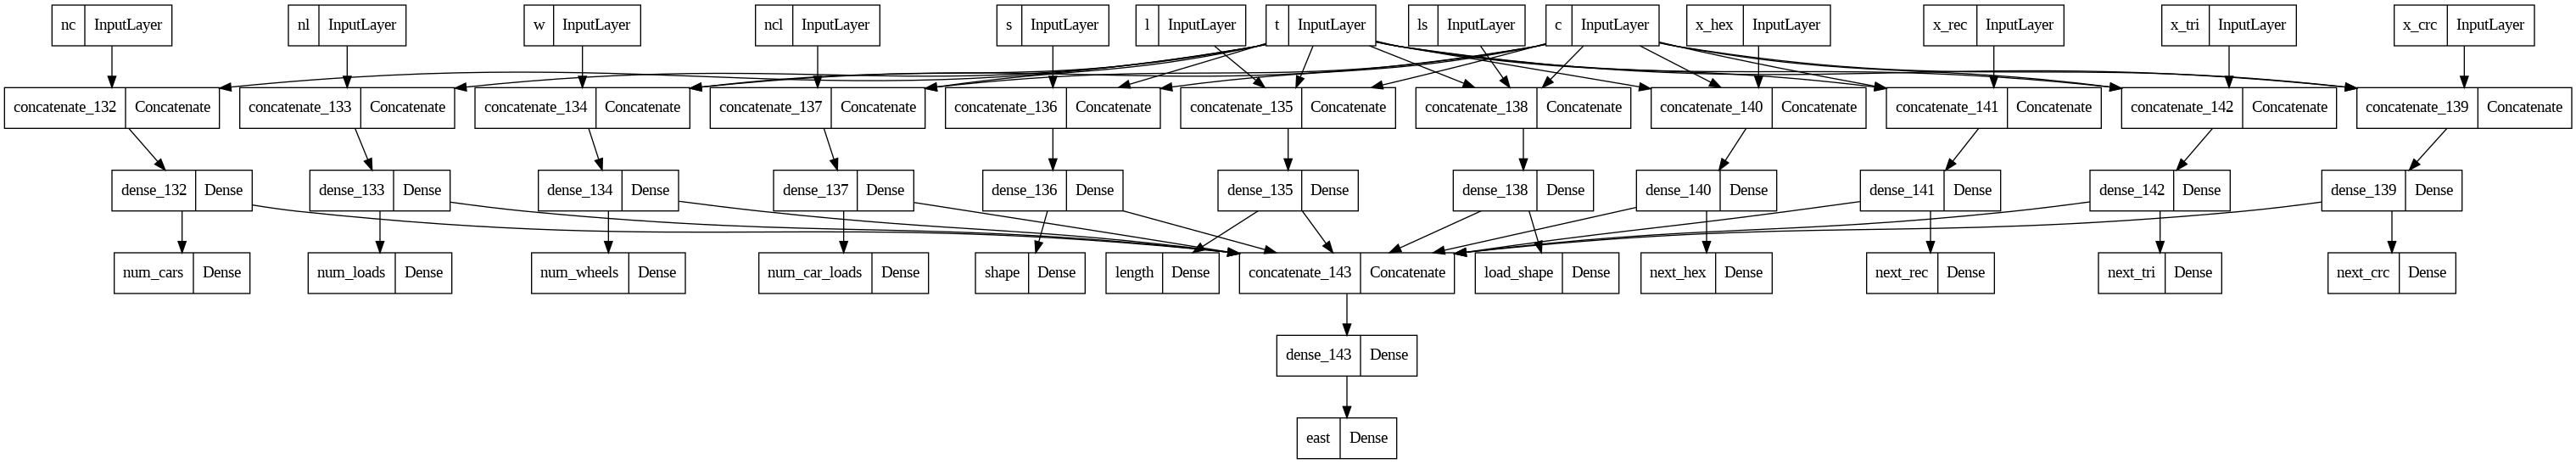

In [ ]:
plot_model(metanet, show_shapes=False, show_layer_names=True)

In [ ]:
  df = read_data()
  cols = [
      [
          c
          for c in df.columns
          if not (str.isdigit(c[-1])) or (str.isdigit(c[-1]) and int(c[-1]) == n)
      ]
      for n in range(1, 5)
  ]

  data = [df[col] for col in cols]
  for c, df in enumerate(data):
      df.columns = [
          name if not str.isdigit(name[-1]) else name[:-1] for name in df.columns
      ]
      df["car"] = c + 1

  data = pd.concat(data)
  data.reset_index(level=0, inplace=True)
  data["train"] = data.pop("index")
  data.T[0]


Number_of_cars                 5
Number_of_different_loads      4
num_wheels                     2
length                         1
shape                          6
num_loads                      3
load_shape                     2
Rectangle_next_to_rectangle    0
Rectangle_next_to_triangle     1
Rectangle_next_to_hexagon      0
Rectangle_next_to_circle       0
Triangle_next_to_triangle      0
Triangle_next_to_hexagon       1
Triangle_next_to_circle        0
Hexagon_next_to_hexagon        0
Hexagon_next_to_circle         1
Circle_next_to_circle          0
Class_attribute                1
car                            1
train                          0
Name: 0, dtype: object

In [ ]:
#Train

def sort_inputs(X):
    t = X["train"].T
    c = X["car"].T
    w = X["num_wheels"].T
    l = X["length"].T
    s = X["shape"].T
    nc = X["Number_of_cars"].T
    ls = X["load_shape"].T
    nl = X["Number_of_different_loads"].T
    ncl = X["num_loads"].T
    x_crc = np.sum(X[[col for col in X if col.endswith("circle")]], axis=1).T
    x_hex = np.sum(X[[col for col in X if col.endswith("hexagon")]], axis=1).T
    x_rec = np.sum(X[[col for col in X if col.endswith("rectangle")]], axis=1).T
    x_tri = np.sum(X[[col for col in X if col.endswith("triangle")]], axis=1).T

    return [t, c, w, l, s, nc, ls, nl, ncl, x_crc, x_hex, x_rec, x_tri]


def split(data, val_train):
    x_train = data.query(f"train != {val_train}")
    x_test = data.query(f"train == {val_train}")
    y_train = np.array(x_train.pop("Class_attribute"))
    y_test = np.array(x_test.pop("Class_attribute"))
    x_train = sort_inputs(x_train)
    x_test = sort_inputs(x_test)

    return x_train, x_test, y_train, y_test

In [ ]:
hists = dict()
question_2_names = [
    "Train",
    "Output of flat network",
    "Desired output",
    "Class",
]
question_2 = {name: [] for name in question_2_names}

for validation_i in tqdm.tqdm(range(0, 10)):
    x_train, x_test, y_train, y_test = split(data, validation_i)
    metanet, east, rules = model_2()

    x_train = [np.asarray(x).astype(int) for x in x_train]
    y_train = np.asarray(y_train).astype(int)
    x_test = [np.asarray(x).astype(int) for x in x_test]
    y_test = np.asarray(y_test).astype(int)


    east.compile(
        loss=binary_crossentropy, optimizer='Adam', metrics=["mse", "binary_accuracy"]
    )
    hist = east.fit(
        x_train,
        y_train,
        validation_data=[x_test, y_test],
        epochs=10,
        verbose=0,
    )
    hists[validation_i] = hist

    question_2["Train"].append(validation_i)
    question_2["Output of flat network"].append(east.predict(x_test)[0][0])
    question_2["Desired output"].append(y_test[0])
    question_2["Class"].append(str_att["Class_attribute"][int(y_test[0])])

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 [==============================] - 0s 248ms/step


 10%|█         | 1/10 [00:21<03:11, 21.27s/it]

1/1 [==============================] - 0s 214ms/step


 20%|██        | 2/10 [00:26<01:32, 11.59s/it]

1/1 [==============================] - 0s 329ms/step


 30%|███       | 3/10 [00:31<01:00,  8.60s/it]

1/1 [==============================] - 0s 232ms/step


 40%|████      | 4/10 [00:36<00:43,  7.27s/it]

1/1 [==============================] - 0s 209ms/step


 50%|█████     | 5/10 [00:41<00:31,  6.36s/it]

1/1 [==============================] - 0s 218ms/step


 60%|██████    | 6/10 [00:47<00:25,  6.33s/it]

1/1 [==============================] - 0s 210ms/step


 70%|███████   | 7/10 [00:52<00:17,  5.83s/it]

1/1 [==============================] - 0s 330ms/step


 80%|████████  | 8/10 [00:57<00:11,  5.56s/it]

1/1 [==============================] - 0s 223ms/step


 90%|█████████ | 9/10 [01:02<00:05,  5.58s/it]

1/1 [==============================] - 0s 223ms/step


100%|██████████| 10/10 [01:08<00:00,  6.82s/it]


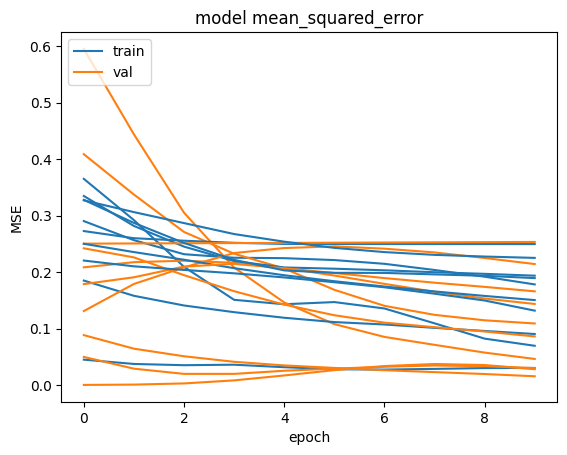

In [ ]:
#Results
for i, history in enumerate(hists.values()):
    plt.plot(history.history['mse'], c='tab:blue')
    plt.plot(history.history['val_mse'], c='tab:orange')

plt.title('model mean_squared_error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


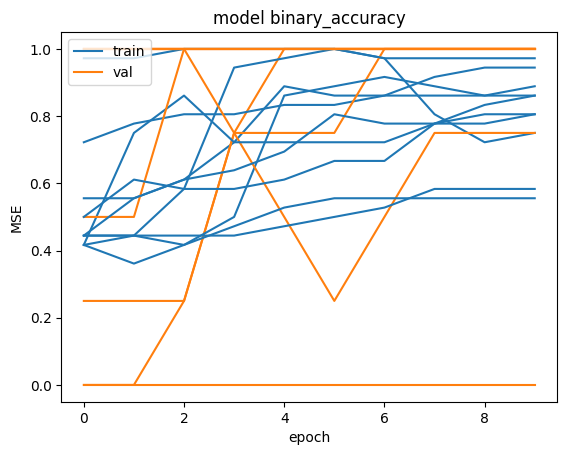

In [ ]:
for i, history in enumerate(hists.values()):
    plt.plot(history.history['binary_accuracy'], c='tab:blue')
    plt.plot(history.history['val_binary_accuracy'], c='tab:orange')

plt.title('model binary_accuracy')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
t2 = pd.DataFrame.from_dict(question_2).round(2)
t2["Cars Accuracy"] = [hists[i].history["binary_accuracy"][-1] for i in range(0, 10)]
t2 = t2.reindex(
    columns=[
        "Train",
        "Cars Accuracy",
        "Output of flat network",
        "Desired output",
        "Class",
    ]
)
t2

,Train,Cars Accuracy,Output of flat network,Desired output,Class
0,0,0.944444,0.66,1,east
1,1,0.750000,0.58,1,east
2,2,0.861111,0.79,1,east
3,3,0.972222,0.78,1,east
4,4,0.888889,0.50,1,east
5,5,0.555556,0.50,0,west
6,6,0.805556,0.25,0,west
7,7,0.583333,0.39,0,west
8,8,0.805556,0.11,0,west
9,9,0.861111,0.09,0,west


#Questão 2.1 - Após comparar o modelo da questão 1 e da questão 2:
Explique o porque das diferenças baseado nas características de arquitetura dos dois
modelos e nos resultados numéricos.

A primeira solução utiliza uma rede neural com uma camada de entrada, uma camada oculta e uma camada de saída. A função de ativação usada na camada de saída é a tangente hiperbólica, que mapeia os valores de saída para o intervalo entre -1 e 1. Os dados de entrada e saída são fornecidos como arrays numpy. O modelo é compilado com a função de perda de erro médio quadrático (MSE) e o otimizador Adam. Neste caso o modelo será capaz de aprender relações não lineares entre os dados de entrada e os dados de saída,  por outro lado, um modelo de aprendizado relacional com meta-redes não é restrito a uma função de ativação específica, pois pode usar diferentes tipos de conexões e regras de inferência para relacionar conceitos nas premissas.

A arquitetura de uma rede neural de classificação segue uma abordagem convencional que utiliza conexões entre camadas para transmitir informações e facilitar o aprendizado. Durante o treinamento, a rede neural é capaz de aprender automaticamente as relações relevantes nos dados, sem que seja necessário especificar explicitamente como os conceitos devem se conectar. Em contraste, um modelo de aprendizado relacional com meta-redes é projetado para estabelecer conexões entre conceitos específicos nas premissas, utilizando estruturas de meta-conhecimento. Essas estruturas podem incluir regras lógicas, inferências e relações mais complexas entre os conceitos, o que proporciona um maior nível de interpretabilidade e explicabilidade em comparação com uma rede neural tradicional.

Ao comparar os resultados das duas abordagens podemos comparar a acurácia dos dois modelos, conforme o gráfico abaixo:










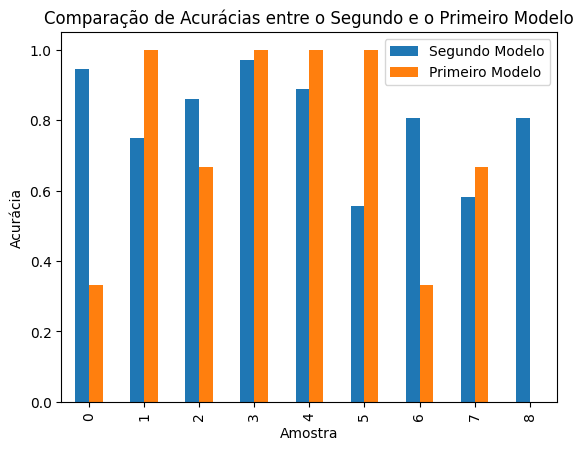

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Listas de acurácias do segundo modelo e do primeiro modelo testado
acuracias_segundo_modelo = [0.9444, 0.7500, 0.86111, 0.9722, 0.8888, 0.5555, 0.80555, 0.5833, 0.8055, 0.86111]
acuracias_primeiro_modelo = [0.3333333333333333, 1.0, 0.6666666666666666, 1.0, 1.0, 1.0, 0.3333333333333333, 0.6666666666666666, 0.0]

# Criar um DataFrame com as acurácias dos dois modelos
df = pd.DataFrame({'Segundo Modelo': acuracias_segundo_modelo[:len(acuracias_primeiro_modelo)],
                   'Primeiro Modelo': acuracias_primeiro_modelo})

# Plotar o gráfico de barras comparativo
df.plot(kind='bar')
plt.xlabel('Amostra')
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácias entre o Segundo e o Primeiro Modelo')
plt.legend()
plt.show()


##Questão 3

In [ ]:
#QUESTÃO_3

# Definir os dados de entrada e saída
X = np.array([
    [4,4,2,1,2,1,1,3,2,2,1,2,2,1,9,1,4,2,2,2,3,3,0,0,0,0,1,0,1,0], #leste
    [3,3,2,1,1,2,1,2,1,8,1,3,2,1,5,1,4,0,0,0,0,0,0,1,0,0,0,0,1,0],
    [3,2,3,2,1,1,4,2,1,6,1,4,2,1,2,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1],
    [4,2,2,1,2,1,3,2,1,4,1,3,2,1,3,1,4,2,1,8,1,4,0,0,0,0,0,1,1,1],
    [3,3,2,1,1,1,1,3,2,1,1,3,2,1,3,1,4,0,0,0,0,0,0,1,0,0,0,0,1,0],
    [4,3,3,2,7,1,3,2,1,6,1,1,2,1,2,1,4,2,2,7,0,0,0,1,1,0,0,0,0,0], #leste expansão
    [3,3,2,2,2,1,2,2,1,1,1,3,2,1,1,1,4,0,0,0,0,0,0,0,0,1,0,0,1,0],
    [4,2,2,1,9,1,3,2,1,8,1,3,2,2,1,1,1,2,1,2,1,3,0,1,0,0,0,1,0,0],
    [4,4,2,2,2,3,3,2,1,2,1,1,3,2,7,1,2,2,1,5,1,4,0,1,0,0,1,0,0,0],
    [4,2,2,1,8,1,4,2,1,5,1,1,2,1,2,1,4,2,1,2,1,4,0,0,1,0,0,0,0,1],
    [3,2,2,1,2,1,4,2,2,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0], #oeste
    [3,2,2,2,7,0,0,2,1,5,1,4,2,1,5,1,4,2,1,2,1,1,0,0,0,0,0,0,1,0],
    [2,2,2,1,5,1,1,3,2,1,1,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
    [4,2,2,1,8,1,1,2,1,2,1,3,3,2,7,1,3,2,1,8,1,1,0,1,0,0,1,0,0,0],
    [2,0,2,2,2,2,3,2,1,4,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
    [2,2,2,1,8,1,3,2,2,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0], #oeste expansão
    [4,3,2,2,2,1,2,2,1,2,1,1,2,1,3,1,2,2,2,2,3,3,1,1,0,0,0,0,0,0],
    [2,2,2,1,5,1,4,3,2,2,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
    [4,2,3,2,1,3,3,2,2,1,3,3,2,2,2,0,0,2,1,5,1,4,0,0,0,0,0,1,0,0],
    [2,2,3,2,1,1,2,2,1,5,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0]])

y = np.array([
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [-1],
    [-1],
    [-1],
    [-1],
    [-1],
    [-1],
    [-1],
    [-1],
    [-1],
    [-1]
])


Teste 1
1/1 [==============================] - 0s 35ms/step
Resposta correta: [1]
O trem vai para oeste.
1/1 [==============================] - 0s 16ms/step
Resposta correta: [1]
Previsao: 0.8346424102783203
O trem vai para leste.
1/1 [==============================] - 0s 15ms/step
Resposta correta: [-1]
O trem vai para oeste.
acertos = 2
ACURACIA = 0.6666666666666666
Teste 2
1/1 [==============================] - 0s 48ms/step
Resposta correta: [1]
Previsao: 0.9626265168190002
O trem vai para leste.
1/1 [==============================] - 0s 20ms/step
Resposta correta: [1]
Previsao: 0.528196394443512
O trem vai para leste.
1/1 [==============================] - 0s 21ms/step
Resposta correta: [-1]
O trem vai para oeste.
acertos = 3
ACURACIA = 1.0
Teste 3
1/1 [==============================] - 0s 32ms/step
Resposta correta: [1]
Previsao: 0.7226108312606812
O trem vai para leste.
1/1 [==============================] - 0s 13ms/step
Resposta correta: [1]
O trem vai para oeste.
1/1 [=========

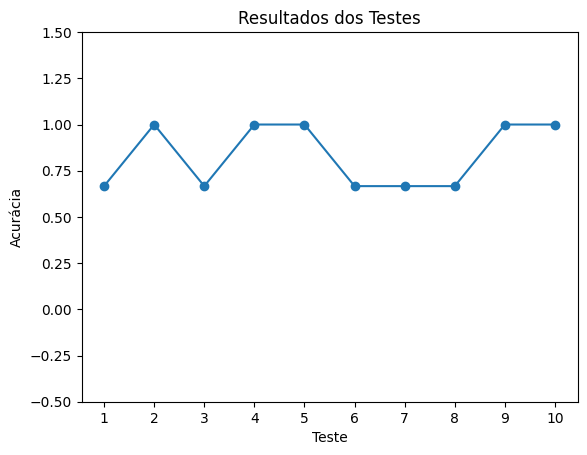

In [ ]:
acuracias3 = []

for i in range(0,10):
  # Criar o modelo da rede neural
  model = Sequential()
  model.add(Dense(32, input_dim=X.shape[1], activation='relu'))
  model.add(Dense(1, activation='tanh'))

  # Compilar o modelo
  model.compile(loss='mse', optimizer='adam')
  print(f"Teste {i+1}")

  #Selecao dos dados de teste e treino
  Selecao = np.array([X[i],  X[(i+1)%10], X[10]])
  Selecao_gabarito = np.array([y[i], y[(i+1)%10], y[10]])
  Teste = np.delete(X, [i, (i+1)%10, 10], axis=0)
  Teste_gabarito = np.delete(y, [i, (i+1)%10, 10], axis=0)

  # Treinar o modelo
  model.fit(Teste, Teste_gabarito, epochs=100, batch_size=1, verbose = 0)

  # Fazer previsões
  acertos = 0
  for j in range(0,3):
    entrada = Selecao[j]
    previsao = model.predict(np.array([entrada]))
    print(f"Resposta correta: {Selecao_gabarito[j]}")
    if previsao[0][0] > 0:
        print(f"Previsao: {previsao[0][0]}")
        print("O trem vai para leste.")
        if Selecao_gabarito[j] == 1:
          acertos += 1
    else:
        print("O trem vai para oeste.")
        if Selecao_gabarito[j] == -1:
          acertos += 1
  print(f"acertos = {acertos}")
  print(f"ACURACIA = {acertos/3}")
  acuracias3.append(acertos/3)

# Criação gráfico da acurácia dos testes removendo dois trens do Oeste e um do Leste
numeros_teste = range(1, len(acuracias3) + 1)
plt.plot(numeros_teste, acuracias3, marker='o')
plt.xlabel('Teste')
plt.ylabel('Acurácia')
plt.title('Resultados dos Testes')
plt.xticks(np.arange(min(numeros_teste), max(numeros_teste)+1, 1))
plt.ylim(-0.5, 1.5)

# Exibir o gráfico
plt.show()


#Ao expandir o modelo adicionando mais trens, obtivemos resultados melhores.